# Normal Equation

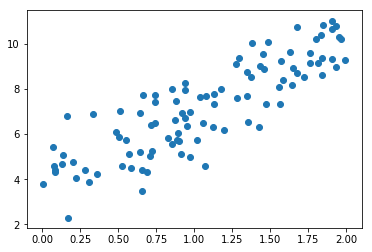

In [1]:
# Exploring the Normal Equation (closed-form solution for linear regression)
# theta_hat = (X_T . X)^-1 . X_T . y

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# equation is y = 4 + 3x + <noise>

plt.scatter(X, y)

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance to account for theta0 bias term
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.84592068],
       [3.11826228]])

In [3]:
# Make predictions based on the theta_best we found with the closed-form solution

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

y_predict

array([[ 3.84592068],
       [10.08244523]])

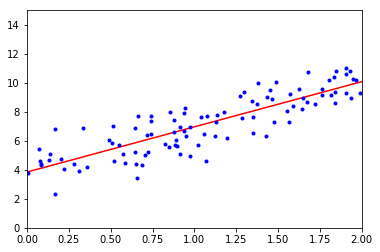

In [4]:
# Plot this model's predictions

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
# Scikit-Learn equivalent

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

print(lin_reg.predict(X_new))

[3.84592068] [[3.11826228]]
[[ 3.84592068]
 [10.08244523]]


# Batch Gradient Descent

In [6]:
# Gradient Descent

eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for _ in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[3.84592068],
       [3.11826228]])

# Stochastic Gradient Descent

In [7]:
# By hand

n_epochs = 50000 # number of epochs
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t1 + t)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        rand_ix = np.random.randint(m) # get a random index of the data set consisting of m items
        xi = X_b[rand_ix:rand_ix + 1]
        yi = y[rand_ix:rand_ix + 1]
        gradients = 2/m * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.14695819],
       [2.37100382]])

In [8]:
# Using Scikit-Learn

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, tol=None)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


(array([3.83332752]), array([3.09409422]))

# Polynomial Regression
## Add powers of each feature as new features

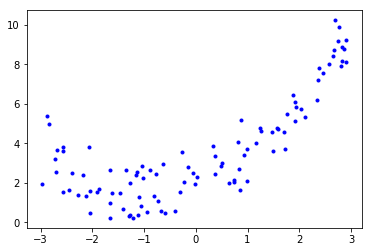

In [9]:
# Create dataset based on quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, 'b.')
plt.show()

In [10]:
# Create the polynomial features

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

[0.99590478]
[0.99590478 0.99182633]


In [11]:
# Perform linear regression on the polynomial features

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.95668823]), array([[0.9975146 , 0.51091634]]))

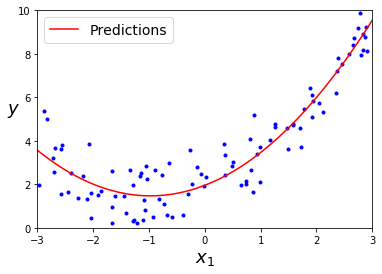

In [18]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_pred = lin_reg.predict(X_new_poly)

plt.plot(X, y, 'b.')
plt.plot(X_new, y_pred, 'r-', label='Predictions') # plot X_new, NOT X_new_poly
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# Learning Curves

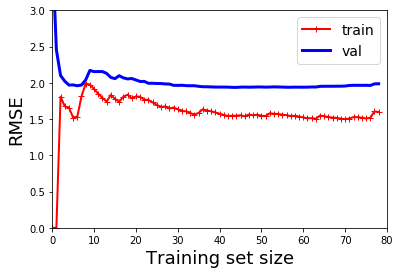

In [42]:
# Plot the model's performance on training set and validation set as a function of the training set size

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.xlabel('Training set size', fontsize=18)
    plt.ylabel('RMSE', rotation=90, fontsize=18)
    plt.legend(loc='upper right', fontsize=14)
    plt.axis([0, 80, 0, 3])
    plt.show()

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

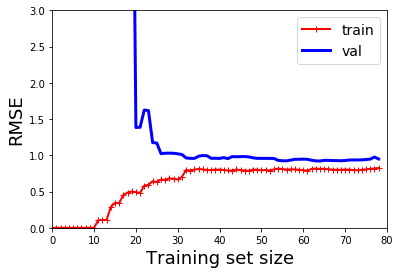

In [46]:
# 10th-degree plynomial model

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)


# Regularized Linear Models
## Ridge Regression, Lasso Regression, Elastic Net, and Early Stopping

In [48]:
# Ridge Regression
# Adds half the square of the l2 norm

# Closed-form solution
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([[5.2157281]])

In [49]:
# Ridge Reg with SGD

sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([4.38128687])

In [51]:
# Least Absolute Shrinkage and Selection Operator Regression (LASSO!)
# Adds the l1 norm

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([5.17472709])

In [54]:
# Elastic Net
# Mix of Ridge and Lasso (l1 and l2). Control mix with r term.

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.17337272])

In [75]:
# Early Stopping
# Quit training as soon as the validation error reaches a minimum

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# prepare the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler()),
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # continues where it left off because warm_start=True
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

print('Best epoch:', best_epoch)
print('Best model:', best_model)

Best epoch: 144
Best model: SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=None,
       n_iter=1, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=True)


# Logistic Regression

In [101]:
# Fun with irises

from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())

X = iris['data'][:, 3] # Get all training examples but only the 3rd dimension (petal width)
y = (iris['target'] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


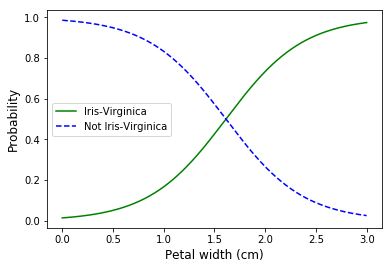

In [110]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X.reshape(-1, 1), y) # fit() expects a 2D array so reshape X

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')
plt.legend(loc='center left', fontsize=10)
plt.xlabel('Petal width (cm)', fontsize=12)
plt.ylabel('Probability', fontsize=12, rotation=90)
plt.show()

In [112]:
# Decision boundary at ~1.6cm
print(log_reg.predict([[1.7], [1.5]]))
print(log_reg.predict_proba([[1.7], [1.5]]))

[1 0]
[[0.44316529 0.55683471]
 [0.57328164 0.42671836]]


In [115]:
#Softmax Regression

X = iris['data'][:, (2, 3)] # petal length, petal width
y = iris['target'] # getting all target classes

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10) # sklearn log reg uses one-vs-all by default
softmax_reg.fit(X, y)

print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
